In [1]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import collections
%matplotlib inline

Using TensorFlow backend.
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jocelyn/opt/anaconda3/lib/pytho

In [2]:
path = glob.glob('../TrafficNet/VolvoData/2019/*.csv')

X_all = np.empty((1, 88))
Y_all = np.empty((1,))

for i in range(len(path)):
    print(i)
    
    Following = pd.read_csv(path[i], usecols=['Lat','Long','Acceleration','Decelerating','Indicator','InReverse','Lane','PositionInLane','Velocity','YawRate','PosLgt1','PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLgt6','PosLgt7','PosLat1','PosLat2','PosLat3','PosLat4','PosLat5','PosLat6','PosLat7','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLgt6','VelLgt7','VelLat1','VelLat2','VelLat3','VelLat4','VelLat5','VelLat6','VelLat7','AccLgt1','AccLgt2','AccLgt3','AccLgt4','AccLgt5','AccLgt6','AccLgt7','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5','AccLat6','AccLat7','Angle1','Angle2','Angle3','Angle4','Angle5','Angle6','Angle7','Type1','Type2','Type3','Type4','Type5','Type6','Type7','Id1','Id2','Id3','Id4','Id5','Id6','Id7','Lane1','Lane2','Lane3','Lane4','Lane5','Lane6','Lane7','PositionInLane1','PositionInLane2','PositionInLane3','PositionInLane4','PositionInLane5','PositionInLane6','PositionInLane7','Lead','Following'])
    Following.fillna(-1, inplace=True)
    
    Y_train = np.array(Following['Following'].values)
    X_train = np.array(Following[['Lat','Long','Acceleration','Decelerating','Indicator','InReverse','Lane','PositionInLane','Velocity','YawRate','PosLgt1','PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLgt6','PosLgt7','PosLat1','PosLat2','PosLat3','PosLat4','PosLat5','PosLat6','PosLat7','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLgt6','VelLgt7','VelLat1','VelLat2','VelLat3','VelLat4','VelLat5','VelLat6','VelLat7','AccLgt1','AccLgt2','AccLgt3','AccLgt4','AccLgt5','AccLgt6','AccLgt7','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5','AccLat6','AccLat7','Angle1','Angle2','Angle3','Angle4','Angle5','Angle6','Angle7','Type1','Type2','Type3','Type4','Type5','Type6','Type7','Id1','Id2','Id3','Id4','Id5','Id6','Id7','Lane1','Lane2','Lane3','Lane4','Lane5','Lane6','Lane7','PositionInLane1','PositionInLane2','PositionInLane3','PositionInLane4','PositionInLane5','PositionInLane6','PositionInLane7','Lead']])
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
    dimof_output = 1
    dimof_input = X_train.shape[1]

    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #print(len(X_train))
    print(X_train.shape, Y_train.shape)
    
    X_all = np.append(X_all, X_train, axis=0)
    Y_all = np.append(Y_all, Y_train, axis=0)

0
(97434, 88) (97434,)
1
(46362, 88) (46362,)
2
(56119, 88) (56119,)
3
(107451, 88) (107451,)
4
(54506, 88) (54506,)
5
(56795, 88) (56795,)
6
(54873, 88) (54873,)
7
(139583, 88) (139583,)
8
(95999, 88) (95999,)
9
(93916, 88) (93916,)
10
(67954, 88) (67954,)
11
(70547, 88) (70547,)
12
(32138, 88) (32138,)


In [4]:
len(X_all)

973678

In [3]:
X_all = X_all[1:973678]
Y_all = Y_all[1:973678]

# Feature selection

## ANOVA f-test Feature Selection

In [4]:
# example of anova f-test feature selection for numerical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

In [5]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 1249.765263
Feature 1: 899.140808
Feature 2: 58.660942
Feature 3: 111.520364
Feature 4: 907.022875
Feature 5: 219.526874
Feature 6: 4778.547826
Feature 7: 9161.778386
Feature 8: 101822.714181
Feature 9: 6.733487
Feature 10: 50133.273621
Feature 11: 54824.250521
Feature 12: 28809.613973
Feature 13: 9753.041460
Feature 14: 2236.124340
Feature 15: 530.876644
Feature 16: 85.168782
Feature 17: 1247.956771
Feature 18: 4335.586739
Feature 19: 2349.211200
Feature 20: 755.293508
Feature 21: 231.860189
Feature 22: 121.497806
Feature 23: 0.190080
Feature 24: 267461.769885
Feature 25: 180449.509738
Feature 26: 64138.885316
Feature 27: 17956.151476
Feature 28: 4082.294036
Feature 29: 955.528821
Feature 30: 157.609096
Feature 31: 20211.490609
Feature 32: 37434.367844
Feature 33: 21305.263497
Feature 34: 6493.225452
Feature 35: 1316.407444
Feature 36: 286.112066
Feature 37: 43.937751
Feature 38: 63419.848476
Feature 39: 66976.546529
Feature 40: 30389.808617
Feature 41: 8434.216698
Feature 

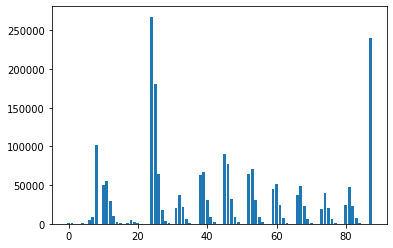

In [6]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.5, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# Modeling With Selected Features

## Model Built Using All Features

In [7]:
# evaluation of a model using all input features
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# split into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 91.63


## Model Built Using ANOVA f-test Features

In [8]:
# evaluation of a model using 4 features chosen with anova f-test
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# feature selection
def select_features_self(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_classif, k=33)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features_self(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat_anova = model.predict(X_test_fs)
# evaluate predictions
accuracy_anova = accuracy_score(y_test, yhat_anova)
print('Accuracy: %.2f' % (accuracy_anova*100))

Accuracy: 91.12


## Tune the Number of Selected Features

In [45]:
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [46]:
path = glob.glob('../TrafficNet/VolvoData/2019/*.csv')

X_all = np.empty((1, 88))
Y_all = np.empty((1,))

for i in range(5):
    print(i)
    
    Following = pd.read_csv(path[i], usecols=['Lat','Long','Acceleration','Decelerating','Indicator','InReverse','Lane','PositionInLane','Velocity','YawRate','PosLgt1','PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLgt6','PosLgt7','PosLat1','PosLat2','PosLat3','PosLat4','PosLat5','PosLat6','PosLat7','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLgt6','VelLgt7','VelLat1','VelLat2','VelLat3','VelLat4','VelLat5','VelLat6','VelLat7','AccLgt1','AccLgt2','AccLgt3','AccLgt4','AccLgt5','AccLgt6','AccLgt7','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5','AccLat6','AccLat7','Angle1','Angle2','Angle3','Angle4','Angle5','Angle6','Angle7','Type1','Type2','Type3','Type4','Type5','Type6','Type7','Id1','Id2','Id3','Id4','Id5','Id6','Id7','Lane1','Lane2','Lane3','Lane4','Lane5','Lane6','Lane7','PositionInLane1','PositionInLane2','PositionInLane3','PositionInLane4','PositionInLane5','PositionInLane6','PositionInLane7','Lead','Following'])
    Following.fillna(-1, inplace=True)
    
    Y_train = np.array(Following['Following'].values)
    X_train = np.array(Following[['Lat','Long','Acceleration','Decelerating','Indicator','InReverse','Lane','PositionInLane','Velocity','YawRate','PosLgt1','PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLgt6','PosLgt7','PosLat1','PosLat2','PosLat3','PosLat4','PosLat5','PosLat6','PosLat7','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLgt6','VelLgt7','VelLat1','VelLat2','VelLat3','VelLat4','VelLat5','VelLat6','VelLat7','AccLgt1','AccLgt2','AccLgt3','AccLgt4','AccLgt5','AccLgt6','AccLgt7','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5','AccLat6','AccLat7','Angle1','Angle2','Angle3','Angle4','Angle5','Angle6','Angle7','Type1','Type2','Type3','Type4','Type5','Type6','Type7','Id1','Id2','Id3','Id4','Id5','Id6','Id7','Lane1','Lane2','Lane3','Lane4','Lane5','Lane6','Lane7','PositionInLane1','PositionInLane2','PositionInLane3','PositionInLane4','PositionInLane5','PositionInLane6','PositionInLane7','Lead']])
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
    dimof_output = 1
    dimof_input = X_train.shape[1]

    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #print(len(X_train))
    print(X_train.shape, Y_train.shape)
    
    X_all = np.append(X_all, X_train, axis=0)
    Y_all = np.append(Y_all, Y_train, axis=0)

0
(97434, 88) (97434,)
1
(46362, 88) (46362,)
2
(56119, 88) (56119,)
3
(107451, 88) (107451,)
4
(54506, 88) (54506,)


In [47]:
len(X_all)

361873

In [48]:
X_all = X_all[1:361873]
Y_all = Y_all[1:361873]

In [5]:
# compare different numbers of features selected using anova f-test


# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X_all.shape[1])]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X_all, Y_all)
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 5 16 23 30 37 44 58 65 72 79 86] are constant.
  UserWarning)
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Best Mean Accuracy: 0.934
Best Config: {'anova__k': 59}


>1 0.901 (0.002)
>2 0.903 (0.002)
>3 0.903 (0.002)
>4 0.904 (0.002)
>5 0.904 (0.002)
>6 0.905 (0.002)
>7 0.895 (0.002)
>8 0.896 (0.002)
>9 0.896 (0.002)
>10 0.898 (0.002)
>11 0.897 (0.002)
>12 0.898 (0.002)
>13 0.903 (0.002)
>14 0.904 (0.002)
>15 0.904 (0.002)
>16 0.904 (0.002)
>17 0.904 (0.002)
>18 0.904 (0.002)
>19 0.907 (0.002)
>20 0.903 (0.002)
>21 0.905 (0.002)
>22 0.905 (0.002)
>23 0.906 (0.002)
>24 0.908 (0.004)
>25 0.914 (0.002)
>26 0.914 (0.002)
>27 0.914 (0.002)
>28 0.915 (0.002)
>29 0.915 (0.002)
>30 0.915 (0.002)
>31 0.916 (0.002)
>32 0.916 (0.002)
>33 0.916 (0.002)
>34 0.918 (0.002)
>35 0.921 (0.002)
>36 0.920 (0.002)
>37 0.920 (0.002)
>38 0.920 (0.002)
>39 0.920 (0.002)
>40 0.920 (0.002)
>41 0.920 (0.002)
>42 0.920 (0.002)
>43 0.921 (0.002)
>44 0.921 (0.002)
>45 0.921 (0.002)
>46 0.923 (0.002)
>47 0.923 (0.002)
>48 0.923 (0.002)
>49 0.923 (0.002)
>50 0.923 (0.002)
>51 0.926 (0.005)
>52 0.929 (0.005)
>53 0.931 (0.004)
>54 0.931 (0.004)
>55 0.931 (0.004)
>56 0.931 (0.004)
>

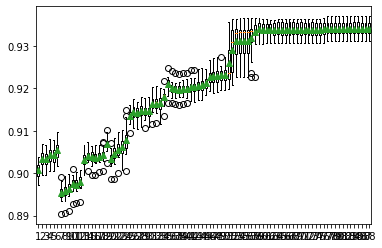

In [6]:
# compare different numbers of features selected using anova f-test


# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_all, Y_all, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define number of features to evaluate
num_features = [i+1 for i in range(X_all.shape[1])]
# enumerate each number of features
results = list()
for k in num_features:
	# create pipeline
	model = LogisticRegression(solver='liblinear')
	fs = SelectKBest(score_func=f_classif, k=k)
	pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
	# evaluate the model
	scores = evaluate_model(pipeline)
	results.append(scores)
	# summarize the results
	print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

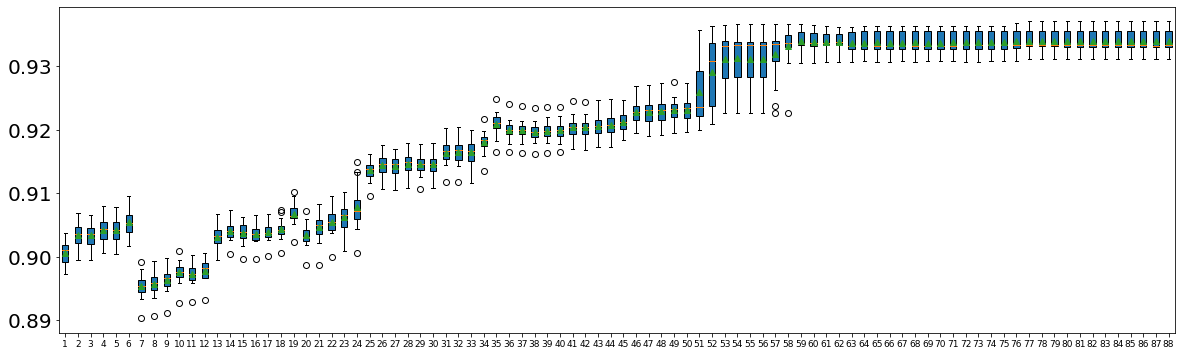

In [7]:
pyplot.figure(figsize=(20,6))
pyplot.boxplot(results, labels=num_features, showmeans=True, patch_artist=True)
pyplot.xticks(fontsize=9)
pyplot.yticks(fontsize=20)
pyplot.show()

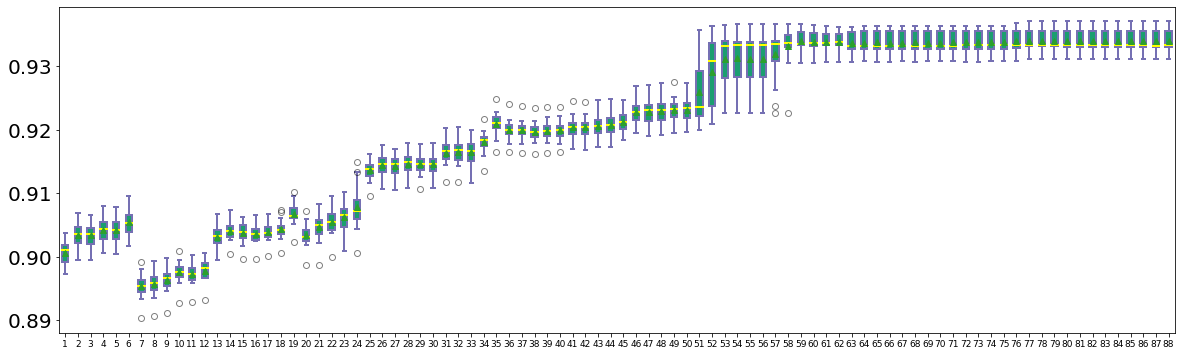

In [8]:
pyplot.figure(figsize=(20,6))
pyplot.xticks(fontsize=9)
pyplot.yticks(fontsize=20)

bp = pyplot.boxplot(results, labels=num_features, showmeans=True, patch_artist=True)
#ax = fig.add_subplot(111)
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e70' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='yellow', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

## the final 59 features

In [50]:
# feature selection
def select_features(X_train, y_train, X_test, n):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k=n)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 416.777594
Feature 1: 238.301498
Feature 2: 21.317291
Feature 3: 4.465424
Feature 4: 30.851215
Feature 5: 149.077271
Feature 6: 158.585614
Feature 7: 956.401900
Feature 8: 24742.780123
Feature 9: 8.708557
Feature 10: 17645.708291
Feature 11: 16076.715258
Feature 12: 7633.233419
Feature 13: 1773.948908
Feature 14: 181.171347
Feature 15: 21.890166
Feature 16: 1.442066
Feature 17: 906.965022
Feature 18: 1821.412246
Feature 19: 983.518697
Feature 20: 138.286482
Feature 21: 0.666879
Feature 22: 0.071182
Feature 23: 1.507142
Feature 24: 89183.747818
Feature 25: 54690.656010
Feature 26: 16729.299474
Feature 27: 3556.396891
Feature 28: 365.600611
Feature 29: 47.134848
Feature 30: 1.273737
Feature 31: 9526.658493
Feature 32: 14812.740096
Feature 33: 5828.315985
Feature 34: 1252.026601
Feature 35: 68.851331
Feature 36: 3.950017
Feature 37: 1.301561
Feature 38: 28680.938132
Feature 39: 24380.598128
Feature 40: 8017.155595
Feature 41: 1610.136186
Feature 42: 117.701584
Feature 43: 8.714

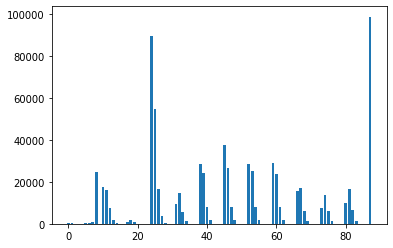

In [51]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.5, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, 59)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [52]:
fs.get_support(indices=True)

array([ 0,  1,  5,  6,  7,  8, 10, 11, 12, 13, 14, 17, 18, 19, 20, 24, 25,
       26, 27, 28, 31, 32, 33, 34, 35, 38, 39, 40, 41, 42, 45, 46, 47, 48,
       49, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 66, 67, 68, 69, 70, 73,
       74, 75, 76, 80, 81, 82, 83, 87])

'Lat','Long','InReverse','Lane','PositionInLane','Velocity','PosLgt1','PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLat1','PosLat2','PosLat3','PosLat4','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLat1','VelLat2','VelLat3','VelLat4','VelLat5','AccLgt1','AccLgt2','AccLgt3','AccLgt4','AccLgt5','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5','Angle1','Angle2','Angle3','Angle4','Angle5','Type1','Type2','Type3','Type4','Type5','Id1','Id2','Id3','Id4','Id5','Lane1','Lane2','Lane3','Lane4','PositionInLane1','PositionInLane2','PositionInLane3','PositionInLane4','Lead'

In [34]:
my_list57 = [ 0,  1,  3,  7,  8,  9, 10, 11, 12, 13, 17, 18, 19, 20, 24, 25, 26,
       27, 28, 31, 32, 33, 34, 38, 39, 40, 41, 42, 45, 46, 47, 48, 49, 52,
       53, 54, 55, 59, 60, 61, 62, 63, 66, 67, 68, 69, 70, 73, 74, 75, 76,
       80, 81, 82, 83, 84, 87]
new_list = [x+1 for x in my_list57]


# Train model

In [2]:
# Set up a 'look back' dataset for sequence to label prediction with Keras.

# The LSTM network expects the input data (X) to be provided with a specific
# array structure in the form of: [samples, time steps, features].

# create_dataset is adapted from
# http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

def create_dataset(X, Y, **options):
    """Convert an array of X, Y values into a dataset matrix for and LSTM"""
    
    look_back = options.pop('look_back', None)
    dataX, dataY = [], []
    for i in range(len(X) - look_back):
        a = X[i:(i+look_back)]
        dataX.append(a)
        dataY.append(Y[i + look_back - 1])
    return np.array(dataX), np.array(dataY)

# Predictions will be based on look_back minutes of data:
look_back = 50

'Lat','Long','Decelerating','PositionInLane','Velocity','YawRate','PosLgt1','PosLgt2','PosLgt3','PosLgt4','PosLat1','PosLat2','PosLat3','PosLat4','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLat1','VelLat2','VelLat3','VelLat4','AccLgt1','AccLgt2','AccLgt3','AccLgt4','AccLgt5','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5','Angle1','Angle2','Angle3','Angle4','Type1','Type2','Type3','Type4','Type5','Id1','Id2','Id3','Id4','Id5','Lane1','Lane2','Lane3','Lane4','PositionInLane1','PositionInLane2','PositionInLane3','PositionInLane4','PositionInLane5','Lead'

In [3]:
path = glob.glob('../TrafficNet/VolvoData/2019/*.csv')

X_all = np.empty((1, 50, 59))
Y_all = np.empty((1,))

for i in range(1,8):
    print(path[i])
    
    Following = pd.read_csv(path[i], usecols=['Lat','Long','InReverse','Lane','PositionInLane','Velocity','PosLgt1','PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLat1','PosLat2','PosLat3','PosLat4','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLat1','VelLat2','VelLat3','VelLat4','VelLat5','AccLgt1','AccLgt2','AccLgt3','AccLgt4','AccLgt5','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5','Angle1','Angle2','Angle3','Angle4','Angle5','Type1','Type2','Type3','Type4','Type5','Id1','Id2','Id3','Id4','Id5','Lane1','Lane2','Lane3','Lane4','PositionInLane1','PositionInLane2','PositionInLane3','PositionInLane4','Lead','Following'])
    Following.fillna(-1, inplace=True)
    
    Y_train = np.array(Following['Following'].values)
    X_train = np.array(Following[['Lat','Long','InReverse','Lane','PositionInLane','Velocity','PosLgt1','PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLat1','PosLat2','PosLat3','PosLat4','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLat1','VelLat2','VelLat3','VelLat4','VelLat5','AccLgt1','AccLgt2','AccLgt3','AccLgt4','AccLgt5','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5','Angle1','Angle2','Angle3','Angle4','Angle5','Type1','Type2','Type3','Type4','Type5','Id1','Id2','Id3','Id4','Id5','Lane1','Lane2','Lane3','Lane4','PositionInLane1','PositionInLane2','PositionInLane3','PositionInLane4','Lead']])
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
    dimof_output = 1
    dimof_input = X_train.shape[1]

    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #print(len(X_train))
    print(X_train.shape, Y_train.shape)
    
    X, Y = create_dataset(X_train, Y_train, look_back=look_back)
    print(X.shape, Y.shape)
    
    X_all = np.append(X_all, X, axis=0)
    Y_all = np.append(Y_all, Y, axis=0)

../TrafficNet/VolvoData/2019/2019w20_Sensor_P514_EU-0024.csv
(46362, 59) (46362,)
(46312, 50, 59) (46312,)
../TrafficNet/VolvoData/2019/2019w05_ConnectedSafety_EU-0052.csv
(56119, 59) (56119,)
(56069, 50, 59) (56069,)
../TrafficNet/VolvoData/2019/2019w26_CPUload_Kiel_Amsterdam-0002.csv
(107451, 59) (107451,)
(107401, 50, 59) (107401,)
../TrafficNet/VolvoData/2019/2019w05_ConnectedSafety_EU-0118.csv
(54506, 59) (54506,)
(54456, 50, 59) (54456,)
../TrafficNet/VolvoData/2019/2019w05_ConnectedSafety_EU-0051.csv
(56795, 59) (56795,)
(56745, 50, 59) (56745,)
../TrafficNet/VolvoData/2019/2019w20_Sensor_P514_EU-0051.csv
(54873, 59) (54873,)
(54823, 50, 59) (54823,)
../TrafficNet/VolvoData/2019/2019w26_CPUload_Kiel_Amsterdam-0008.csv
(95999, 59) (95999,)
(95949, 50, 59) (95949,)


In [4]:
(len(X_all)//64)*64 + 1

471745

In [5]:
X_all = X_all[1:471745]
Y_all = Y_all[1:471745]

collections.Counter(Y_all)

Counter({1.0: 205872, 0.0: 265872})

In [6]:
205872/265872

0.774327495937895

In [7]:
# Create the LSTM network.
batch_size = 32
dropout = 0.5
num_epoch = 100
earlyStopping = EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')
weights = {0:1, 1:1}

In [10]:
model_Flow1 = Sequential()
model_Flow1.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
model_Flow1.add(Dropout(dropout))
model_Flow1.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_Flow1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 5..., units=10)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
model_Flow1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (32, 10)                  2800      
_________________________________________________________________
dropout_1 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_1 (Dense)              (32, 1)                   11        
Total params: 2,811
Trainable params: 2,811
Non-trainable params: 0
_________________________________________________________________


In [12]:
history1 = model_Flow1.fit(
    X_all, Y_all,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 284544 samples, validate on 284544 samples
Epoch 1/100
284544/284544 [==============================] - 2126s 7ms/step - loss: 0.1417 - accuracy: 0.9485 - val_loss: 0.3041 - val_accuracy: 0.9244
Epoch 2/100
284544/284544 [==============================] - 2337s 8ms/step - loss: 0.0761 - accuracy: 0.9716 - val_loss: 0.3233 - val_accuracy: 0.9262


In [13]:
history1.history

{'val_loss': [0.3041487165044521, 0.32330540867271146],
 'val_accuracy': [0.9244299530982971, 0.9262117743492126],
 'loss': [0.14168367269545293, 0.07614327611563391],
 'accuracy': [0.94847196, 0.971551]}

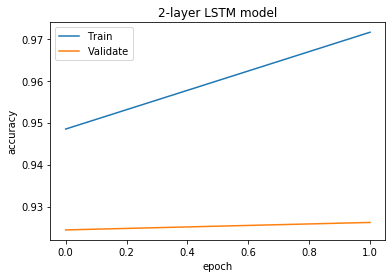

In [14]:
# Plot history for training and validation loss.

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('2-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

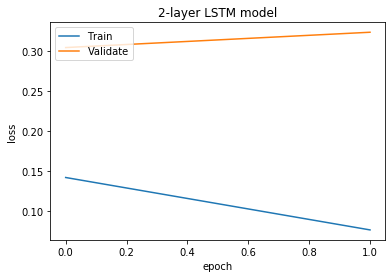

In [15]:
# Plot history for training and validation loss.

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('2-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [16]:
model_Flow2 = Sequential()
model_Flow2.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
model_Flow2.add(Dropout(dropout))
model_Flow2.add(Dense(30, activation='relu'))
model_Flow2.add(Dropout(dropout))
model_Flow2.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_Flow2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 5..., units=10)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [14]:
model_Flow2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (32, 10)                  2720      
_________________________________________________________________
dropout_2 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_2 (Dense)              (32, 30)                  330       
_________________________________________________________________
dropout_3 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_3 (Dense)              (32, 1)                   31        
Total params: 3,081
Trainable params: 3,081
Non-trainable params: 0
_________________________________________________________________


In [17]:
history2 = model_Flow2.fit(
    X_all, Y_all,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 284544 samples, validate on 284544 samples
Epoch 1/100
284544/284544 [==============================] - 2391s 8ms/step - loss: 0.1423 - accuracy: 0.9473 - val_loss: 0.4351 - val_accuracy: 0.9146
Epoch 2/100
284544/284544 [==============================] - 2286s 8ms/step - loss: 0.0838 - accuracy: 0.9711 - val_loss: 0.3375 - val_accuracy: 0.9325
Epoch 3/100
284544/284544 [==============================] - 2335s 8ms/step - loss: 0.0686 - accuracy: 0.9764 - val_loss: 0.4252 - val_accuracy: 0.9300


In [18]:
history2.history

{'val_loss': [0.4350904177227971, 0.3375181975126447, 0.42520617820533047],
 'val_accuracy': [0.9145896434783936, 0.9325200915336609, 0.929961621761322],
 'loss': [0.14232472889430395, 0.08376300796415315, 0.06864543325913751],
 'accuracy': [0.94725597, 0.9710941, 0.97640085]}

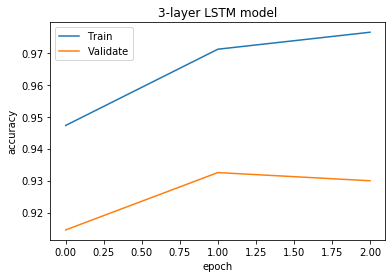

In [19]:
# Plot history for training and validation loss.

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('3-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

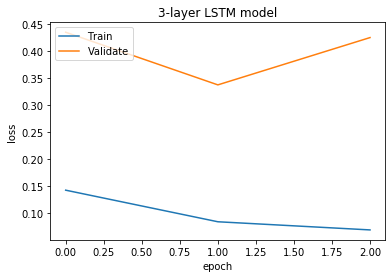

In [20]:
# Plot history for training and validation loss.

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('3-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [21]:
model_Flow3 = Sequential()
model_Flow3.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
model_Flow3.add(Dropout(dropout))
model_Flow3.add(Dense(30, activation='relu'))
model_Flow3.add(Dropout(dropout))
model_Flow3.add(Dense(30, activation='relu'))
model_Flow3.add(Dropout(dropout))
model_Flow3.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_Flow3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 5..., units=10)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [20]:
model_Flow3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (32, 10)                  2720      
_________________________________________________________________
dropout_4 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_4 (Dense)              (32, 30)                  330       
_________________________________________________________________
dropout_5 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_5 (Dense)              (32, 30)                  930       
_________________________________________________________________
dropout_6 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_6 (Dense)              (32, 1)                  

In [22]:
history3 = model_Flow3.fit(
    X_all, Y_all,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 284544 samples, validate on 284544 samples
Epoch 1/100
284544/284544 [==============================] - 2471s 9ms/step - loss: 0.1445 - accuracy: 0.9472 - val_loss: 0.3628 - val_accuracy: 0.9183
Epoch 2/100
284544/284544 [==============================] - 2473s 9ms/step - loss: 0.0796 - accuracy: 0.9731 - val_loss: 0.4069 - val_accuracy: 0.9212


In [23]:
history3.history

{'val_loss': [0.362787202033087, 0.4068854886051332],
 'val_accuracy': [0.9182551503181458, 0.9211861491203308],
 'loss': [0.14447938424072262, 0.07962984826308789],
 'accuracy': [0.9472173, 0.97310436]}

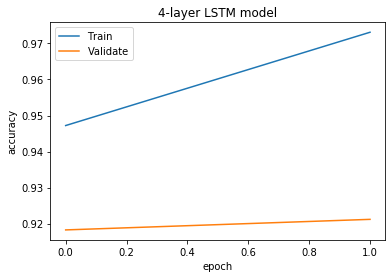

In [24]:
# Plot history for training and validation loss.

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('4-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

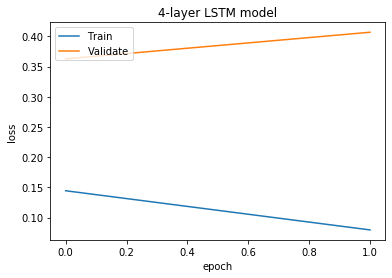

In [25]:
# Plot history for training and validation loss.

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('4-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [8]:
model_Flow4 = Sequential()
model_Flow4.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
model_Flow4.add(Dropout(dropout))
model_Flow4.add(Dense(30, activation='relu'))
model_Flow4.add(Dropout(dropout))
model_Flow4.add(Dense(30, activation='relu'))
model_Flow4.add(Dropout(dropout))
model_Flow4.add(Dense(10, activation='relu'))
model_Flow4.add(Dropout(dropout))
model_Flow4.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_Flow4.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 5..., units=10)`
  


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


In [26]:
model_Flow4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (32, 10)                  2720      
_________________________________________________________________
dropout_7 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_7 (Dense)              (32, 30)                  330       
_________________________________________________________________
dropout_8 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_8 (Dense)              (32, 30)                  930       
_________________________________________________________________
dropout_9 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_9 (Dense)              (32, 10)                 

In [9]:
history4 = model_Flow4.fit(
    X_all, Y_all,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 235872 samples, validate on 235872 samples
Epoch 1/100
235872/235872 [==============================] - 1655s 7ms/step - loss: 0.2056 - accuracy: 0.9307 - val_loss: 0.3713 - val_accuracy: 0.9213
Epoch 2/100
235872/235872 [==============================] - 1752s 7ms/step - loss: 0.1195 - accuracy: 0.9639 - val_loss: 0.3875 - val_accuracy: 0.9297


In [10]:
history4.history

{'val_loss': [0.37133047851284184, 0.38745036169851693],
 'val_accuracy': [0.9212878346443176, 0.9296694993972778],
 'loss': [0.20555034998676466, 0.11946064939669605],
 'accuracy': [0.9307463, 0.9638787]}

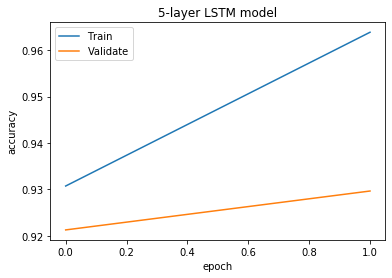

In [11]:
# Plot history for training and validation loss.

plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('5-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

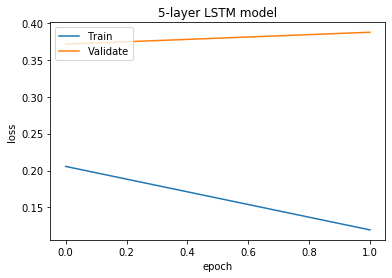

In [12]:
# Plot history for training and validation loss.

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('5-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [13]:
model_Flow5 = Sequential()
model_Flow5.add(LSTM(output_dim=20, batch_input_shape=[batch_size, look_back, dimof_input]))
model_Flow5.add(Dropout(dropout))
model_Flow5.add(Dense(40, activation='relu'))
model_Flow5.add(Dropout(dropout))
model_Flow5.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_Flow5.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 5..., units=20)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [27]:
model_Flow5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (32, 20)                  6400      
_________________________________________________________________
dropout_7 (Dropout)          (32, 20)                  0         
_________________________________________________________________
dense_7 (Dense)              (32, 40)                  840       
_________________________________________________________________
dropout_8 (Dropout)          (32, 40)                  0         
_________________________________________________________________
dense_8 (Dense)              (32, 1)                   41        
Total params: 7,281
Trainable params: 7,281
Non-trainable params: 0
_________________________________________________________________


In [14]:
history5 = model_Flow5.fit(
    X_all, Y_all,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 235872 samples, validate on 235872 samples
Epoch 1/100
235872/235872 [==============================] - 1795s 8ms/step - loss: 0.1015 - accuracy: 0.9640 - val_loss: 0.3035 - val_accuracy: 0.9360
Epoch 2/100
235872/235872 [==============================] - 1793s 8ms/step - loss: 0.0479 - accuracy: 0.9837 - val_loss: 0.3395 - val_accuracy: 0.9372


In [15]:
history5.history

{'val_loss': [0.3035388656740294, 0.3394814555314338],
 'val_accuracy': [0.9359822273254395, 0.9371650815010071],
 'loss': [0.10148630073286337, 0.047910040498418766],
 'accuracy': [0.9640101, 0.9837115]}

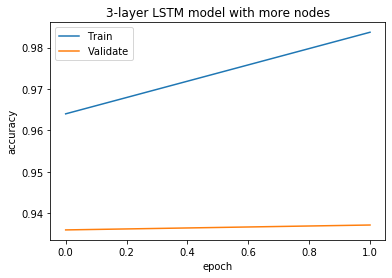

In [16]:
# Plot history for training and validation loss.

plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('3-layer LSTM model with more nodes')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

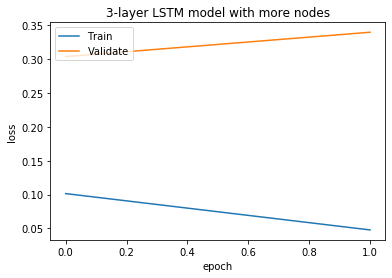

In [17]:
# Plot history for training and validation loss.

plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('3-layer LSTM model with more nodes')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [20]:
model_Flow6 = Sequential()
model_Flow6.add(LSTM(output_dim=30, batch_input_shape=[batch_size, look_back, dimof_input]))
model_Flow6.add(Dropout(dropout))
model_Flow6.add(Dense(50, activation='relu'))
model_Flow6.add(Dropout(dropout))
model_Flow6.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_Flow6.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 5..., units=30)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [21]:
model_Flow6.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (32, 30)                  10800     
_________________________________________________________________
dropout_7 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_7 (Dense)              (32, 50)                  1550      
_________________________________________________________________
dropout_8 (Dropout)          (32, 50)                  0         
_________________________________________________________________
dense_8 (Dense)              (32, 1)                   51        
Total params: 12,401
Trainable params: 12,401
Non-trainable params: 0
_________________________________________________________________


In [22]:
history6 = model_Flow6.fit(
    X_all, Y_all,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 235872 samples, validate on 235872 samples
Epoch 1/100
235872/235872 [==============================] - 1887s 8ms/step - loss: 0.0927 - accuracy: 0.9668 - val_loss: 0.3031 - val_accuracy: 0.9308
Epoch 2/100
235872/235872 [==============================] - 1901s 8ms/step - loss: 0.0439 - accuracy: 0.9850 - val_loss: 0.3687 - val_accuracy: 0.9306


In [23]:
history6.history

{'val_loss': [0.30311211386263953, 0.36871775568399695],
 'val_accuracy': [0.930759072303772, 0.9305852055549622],
 'loss': [0.09269670927251765, 0.043870982669435454],
 'accuracy': [0.9667659, 0.9849707]}

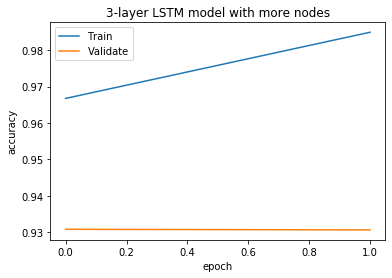

In [24]:
# Plot history for training and validation loss.

plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('3-layer LSTM model with more nodes')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

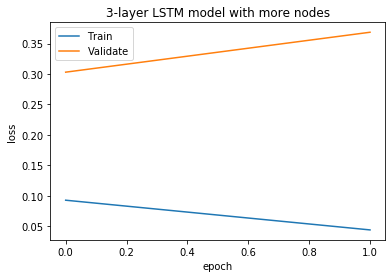

In [25]:
# Plot history for training and validation loss.

plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('3-layer LSTM model with more nodes')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

## serialize model to JSON
https://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [18]:
model_json2 = model_Flow6.to_json()
with open("FollowingVolvo6.json", "w") as json_file:
    json_file.write(model_json2)
    
# serialize weights to HDF5
model_Flow6.save_weights("FollowingVolvo6_weights.h5")
print("Saved model to disk")

Saved model to disk


## Save Model Weights and Architecture Together

In [19]:
#model_Flow1.save("TrafficNetToVolvo_FlowMaskingSparse-1.h5")
model_Flow6.save("FollowingVolvo6.h5")
print("Saved model to disk")

Saved model to disk


In [27]:
volvo = pd.read_csv('../TrafficNet/VolvoData/2019w26_CPUload_Kiel_Amsterdam-0011.csv', usecols=['Lat','Long','InReverse','Lane','PositionInLane','Velocity','PosLgt1','PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLat1','PosLat2','PosLat3','PosLat4','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLat1','VelLat2','VelLat3','VelLat4','VelLat5','AccLgt1','AccLgt2','AccLgt3','AccLgt4','AccLgt5','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5','Angle1','Angle2','Angle3','Angle4','Angle5','Type1','Type2','Type3','Type4','Type5','Id1','Id2','Id3','Id4','Id5','Lane1','Lane2','Lane3','Lane4','PositionInLane1','PositionInLane2','PositionInLane3','PositionInLane4','Lead','Following'])
volvo.fillna(-1, inplace=True)

Yvolvo = np.array(volvo['Following'].values)
Xvolvo = np.array(volvo[['Lat','Long','InReverse','Lane','PositionInLane','Velocity','PosLgt1','PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLat1','PosLat2','PosLat3','PosLat4','VelLgt1','VelLgt2','VelLgt3','VelLgt4','VelLgt5','VelLat1','VelLat2','VelLat3','VelLat4','VelLat5','AccLgt1','AccLgt2','AccLgt3','AccLgt4','AccLgt5','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5','Angle1','Angle2','Angle3','Angle4','Angle5','Type1','Type2','Type3','Type4','Type5','Id1','Id2','Id3','Id4','Id5','Lane1','Lane2','Lane3','Lane4','PositionInLane1','PositionInLane2','PositionInLane3','PositionInLane4','Lead']])
    
# Scale/whiten the X data
scaler = StandardScaler()
X_volvo = scaler.fit_transform(Xvolvo)
XP_volvo, YP_volvo = create_dataset(X_volvo, Yvolvo, look_back=look_back)

(len(XP_volvo)//64)*64

XPP_volvo = XP_volvo[:139520]
YPP_volvo = YP_volvo[:139520]

In [28]:
from datetime import datetime
start=datetime.now()
Y_predict_volvo = model_Flow5.predict_classes(XPP_volvo, verbose=True)
print(datetime.now()-start)

#equal_arrays_volvo = (Y_predict_volvo == YPP_volvo).all(axis=1)
#acc_volvo = np.count_nonzero(equal_arrays_volvo == True)/len(equal_arrays_volvo)
a = Y_predict_volvo.tolist()
a2 = [item[0] for item in a]
b = YPP_volvo.tolist()
equal_arrays_volvo = [i for i, (x, y) in enumerate(zip(a2, b)) if x == y]
acc_volvo = len(equal_arrays_volvo)/len(a2)
print(acc_volvo)

139520/139520 [==============================] - 123s 880us/step
0:02:03.215906
0.8813575114678899


In [29]:
f = open("predict_FollowingVolvo5.csv", "w")

for index in range(len(a2)):
    f.write(str(a2[index]) + "," + str(b[index]) + "\n")
f.close()

In [ ]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model = load_model('model.h5')
# summarize model.
model.summary()
# load dataset
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

In [ ]:
# Write predictions to disk

data1988.to_csv("TrafficNetToVolvo-6.1-CutIn-Masking_PredictionResult.csv", encoding='utf_8_sig', index=False)